# Task
Build a machine learning model to predict manufacturing defects, including data loading, exploration, preprocessing, model training, evaluation, and visualization, culminating in a summary of key findings and influential factors.

## Load Manufacturing Data

### Subtask:
Load the manufacturing dataset into a pandas DataFrame. We'll need to identify the data source (e.g., CSV, Excel) and ensure it's accessible.


**Reasoning**:
The first step is to import the pandas library, load the data from 'data.csv' into a DataFrame, display its head, and then show its information to understand the dataset structure as requested by the instructions.



In [4]:
import pandas as pd

# Load the manufacturing dataset into a pandas DataFrame
df = pd.read_csv('/content/archive.zip')

# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Display a concise summary of the DataFrame
print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.514504     90.350550                 1            2.464923   
3    0.638524     67.628690                 8            4.692476   
4    3.867784     82.728334                 9            2.746726   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           8.630515      0.081322           85.0423

## Explore and Prepare Data

### Subtask:
Perform exploratory data analysis (EDA) to understand the features, identify potential issues like missing values or outliers, and preprocess the data for model training. This includes handling categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
First, I will display descriptive statistics for all numerical columns and check the distribution of the target variable 'DefectStatus' to understand the dataset's basic characteristics.



In [5]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

print("\nDistribution of the target variable 'DefectStatus':")
print(df['DefectStatus'].value_counts())

Descriptive statistics for numerical columns:
       ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
count       3240.000000     3240.000000      3240.000000    3240.000000   
mean         548.523148    12423.018476        89.833290       2.558951   
std          262.402073     4308.051904         5.759143       1.705804   
min          100.000000     5000.174521        80.004820       0.000000   
25%          322.000000     8728.829280        84.869219       1.000000   
50%          549.000000    12405.204656        89.704861       3.000000   
75%          775.250000    16124.462428        94.789936       4.000000   
max          999.000000    19993.365549        99.989214       5.000000   

        DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
count  3240.000000   3240.000000       3240.000000         3240.000000   
mean      2.749116     80.134272         11.476543            2.501373   
std       1.310154     11.611750          6.872684      

**Reasoning**:
Next, I will calculate the correlation matrix for all numerical features in the DataFrame and visualize it as a heatmap to understand the relationships between variables, as specified in the instructions.



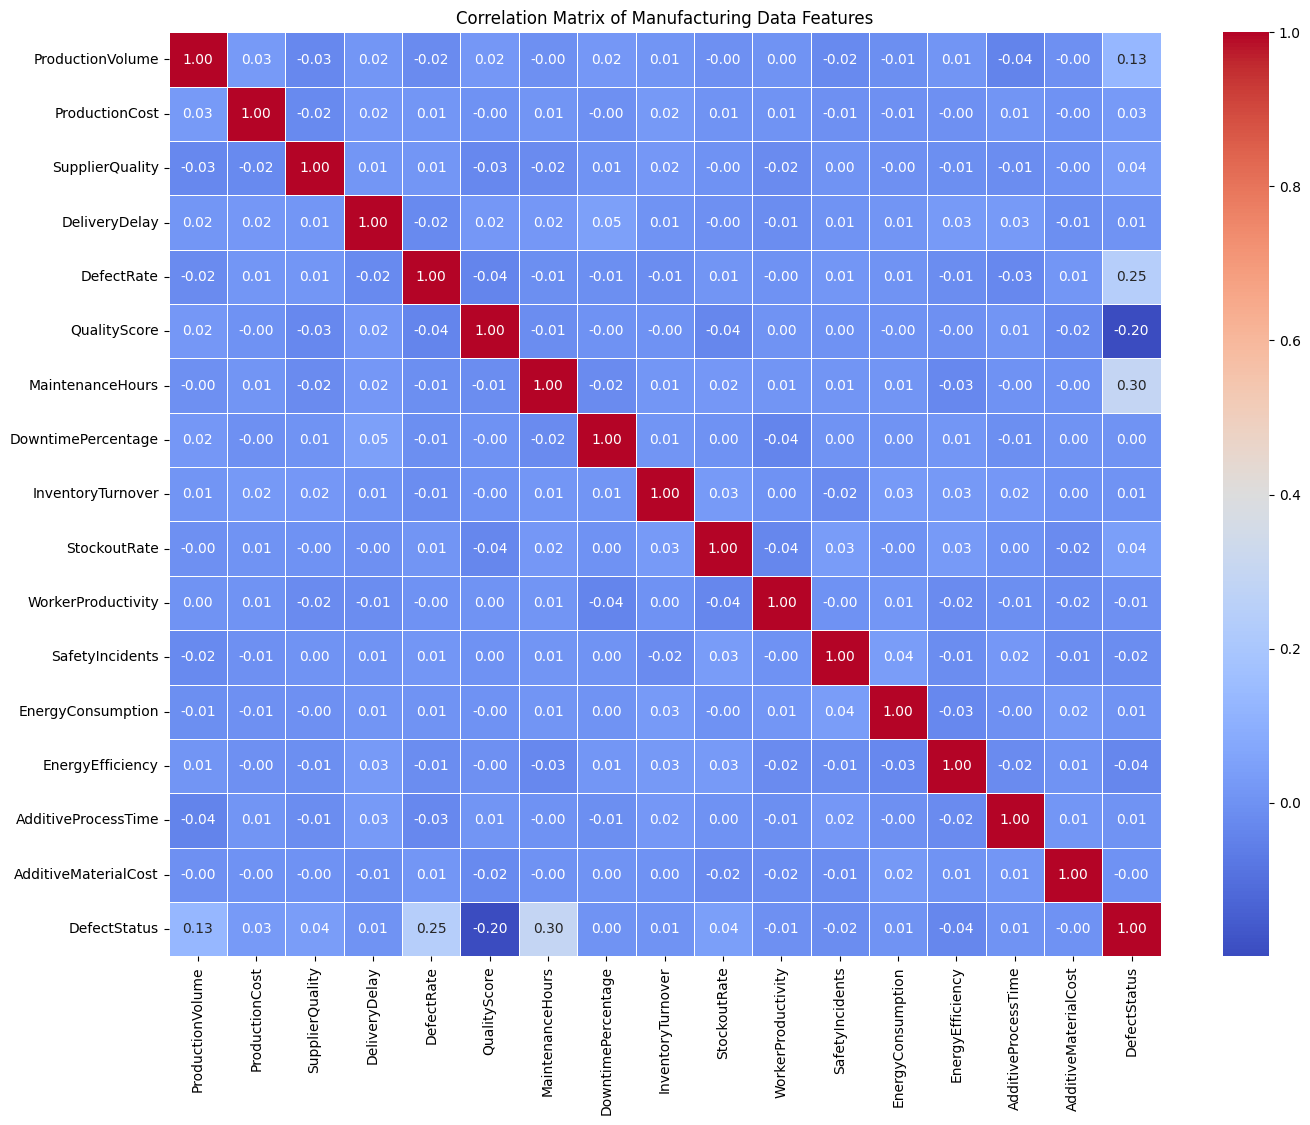

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Manufacturing Data Features')
plt.show()

**Reasoning**:
Following the instructions, I will now separate the features (X) from the target variable (y), assigning all columns except 'DefectStatus' to `X` and 'DefectStatus' to `y`.



In [7]:
X = df.drop('DefectStatus', axis=1)
y = df['DefectStatus']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Features (X) shape: (3240, 16)
Target (y) shape: (3240,)
First 5 rows of X:
   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.514504     90.350550                 1            2.464923   
3    0.638524     67.628690                 8            4.692476   
4    3.867784     82.728334                 9            2.746726   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0      

**Reasoning**:
As per the instructions, I will now scale the numerical features in `X` using `StandardScaler` and then convert the transformed data back into a pandas DataFrame, preserving the column names.



In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features (X)
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame, preserving column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of scaled features (X_scaled_df):")
print(X_scaled_df.head())
print("Shape of scaled features (X_scaled_df):", X_scaled_df.shape)

First 5 rows of scaled features (X_scaled_df):
   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0         -1.320785        0.174673        -0.553077      -0.914050   
1         -0.051544        1.705681        -0.611752       0.844922   
2          1.568358        1.541028        -1.337353      -1.500375   
3         -0.680447       -1.572975        -0.433695       1.431246   
4         -1.305539       -1.149373        -1.362114       0.258598   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    0.284267     -1.435903         -0.360401           -1.696637   
1   -1.473020      0.306939          1.240385            1.667488   
2    1.347673      0.879958         -1.524610           -0.025252   
3   -1.611198     -1.077143         -0.505928            1.517950   
4    0.853976      0.223434         -0.360401            0.169975   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           1.120811      1.057329  

**Reasoning**:
As per the instructions, I will now split the scaled features (`X_scaled_df`) and the target variable (`y`) into training and testing sets using `train_test_split`, with an 80/20 ratio and `random_state=42` for reproducibility.



In [9]:
from sklearn.model_selection import train_test_split

# Split the scaled features (X_scaled_df) and the target variable (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2592, 16)
X_test shape: (648, 16)
y_train shape: (2592,)
y_test shape: (648,)


## Train Prediction Model

### Subtask:
Train a machine learning classification model to predict manufacturing defects. This step will involve selecting an appropriate algorithm (e.g., Logistic Regression, Random Forest, Gradient Boosting) and training it on the prepared training data.


**Reasoning**:
As per the instructions, I will import `RandomForestClassifier`, instantiate it with `random_state=42`, and then fit the model to the training data (`X_train`, `y_train`), storing the trained model in a variable named `model`.



In [10]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


**Reasoning**:
Now that the model has been trained, I will evaluate its performance using the testing data (`X_test` and `y_test`), calculate the accuracy score, and display a classification report to assess precision, recall, and F1-score.



In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Model Accuracy: 0.9552

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.96       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.96      0.95       648



## Evaluate Model Performance

### Subtask:
Evaluate the performance of the trained model using relevant metrics such as accuracy, precision, recall, F1-score, and ROC-AUC on the test set.


**Reasoning**:
As per the instructions, I will predict the probabilities for the positive class (class 1) on the test set using the trained model's `.predict_proba()` method, then calculate and print the ROC-AUC score using `roc_auc_score` with `y_test` and these predicted probabilities.



In [12]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.8712


## Visualize Model Results

### Subtask:
Generate visualizations to illustrate the model's performance, such as a confusion matrix, ROC curve, or feature importance plot to understand which factors contribute most to defect prediction. Please include legends for all visualizations.


**Reasoning**:
As per the instructions, I will now generate the confusion matrix, ROC curve, and feature importance plot to visualize the model's performance and understand influential factors. I will import the necessary libraries, calculate the confusion matrix, create a heatmap, plot the ROC curve, extract feature importances, and finally create a bar plot of the top features, ensuring all plots have appropriate titles and labels.



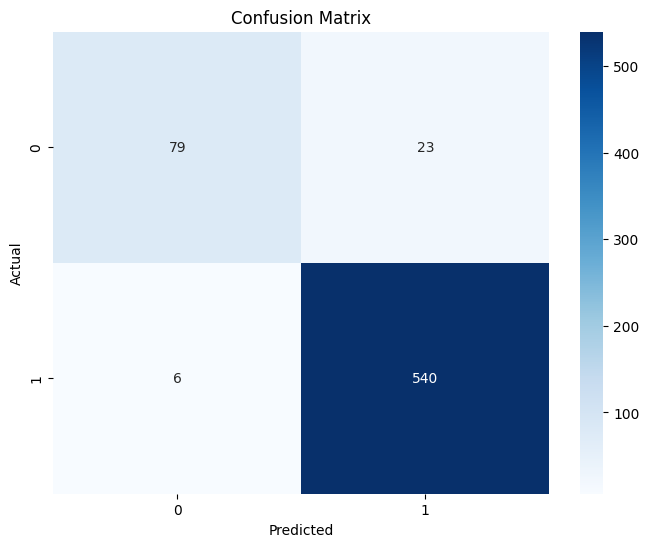

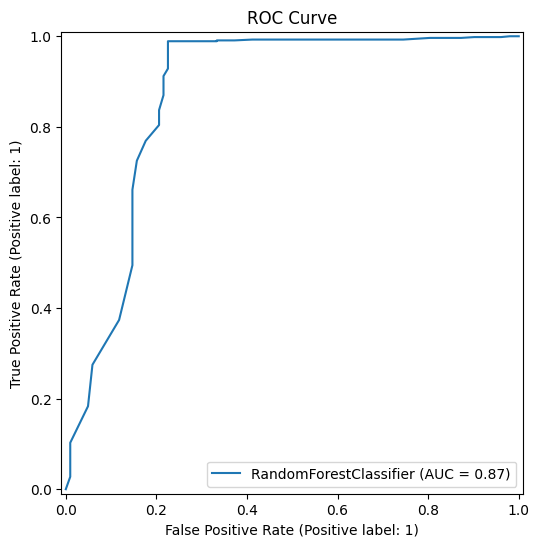

/tmp/ipython-input-3972906071.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index, palette='viridis')


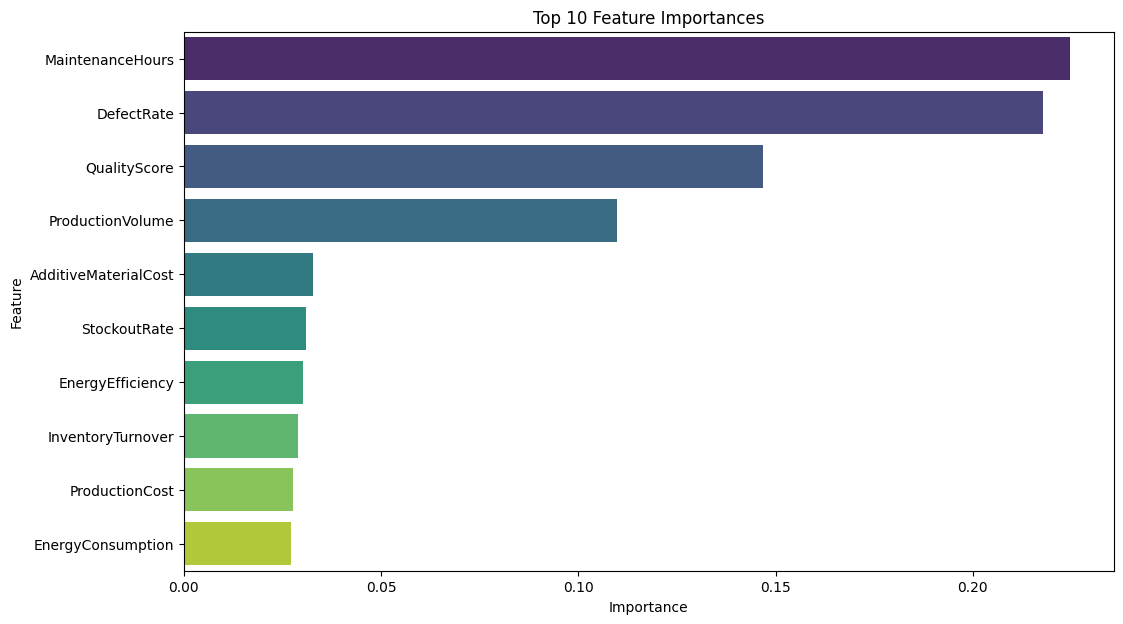

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, RocCurveDisplay

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=plt.gca())
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

**Reasoning**:
The previous `seaborn.barplot` call raised a `FutureWarning` because `palette` was used without `hue`. To fix this, I will explicitly assign the `y` variable to `hue` and set `legend=False` in the `sns.barplot` function call for the feature importance plot.



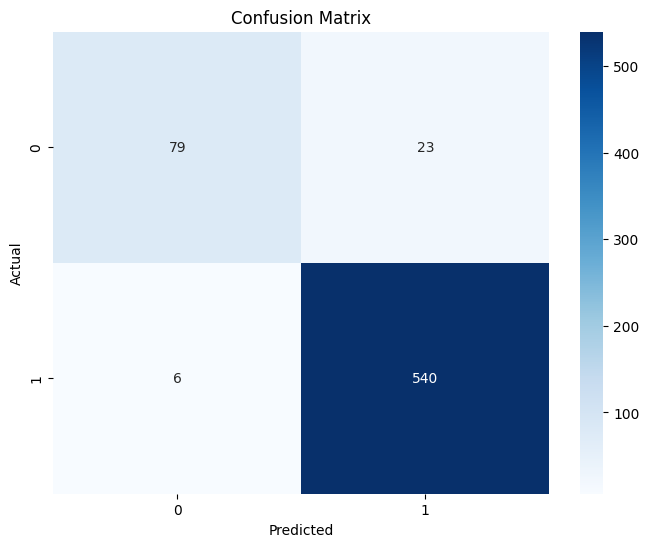

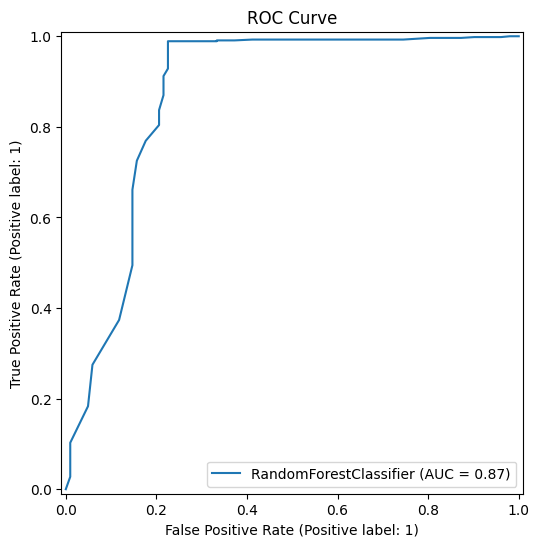

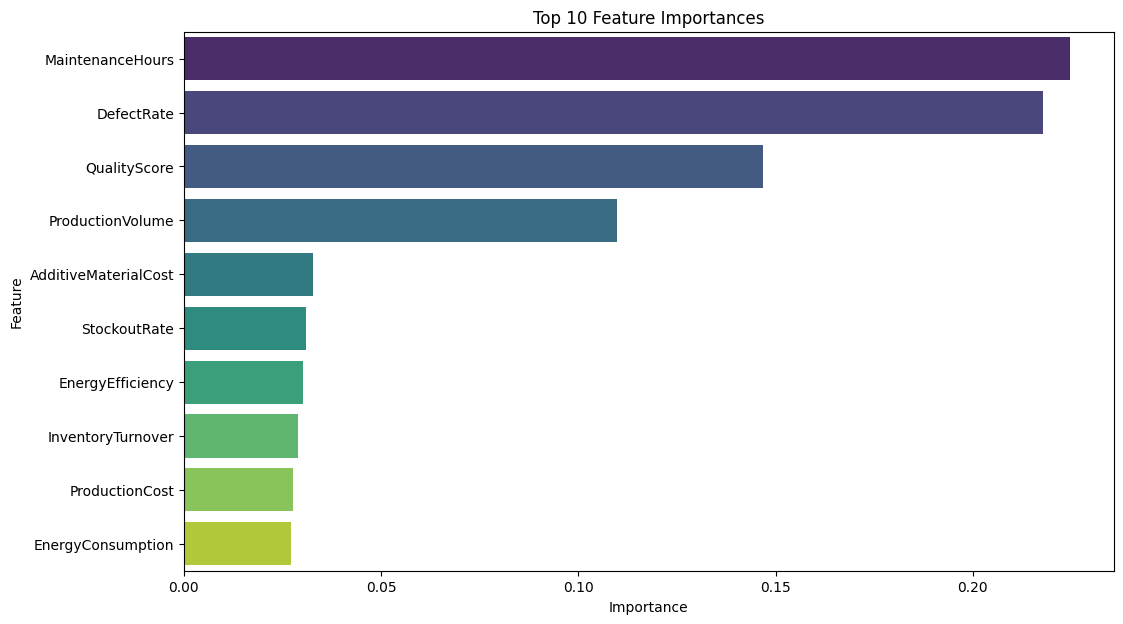

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, RocCurveDisplay

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=plt.gca())
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index, hue=feature_importances.head(10).index, palette='viridis', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the model, including its predictive performance and the most influential factors in defect prediction.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 3240 entries and 17 columns, with no missing values.
*   The target variable, `DefectStatus`, shows an imbalance, with 2723 instances classified as '1' (defects) and 517 instances as '0' (no defects).
*   A RandomForestClassifier model was trained to predict manufacturing defects.
*   The model achieved an overall accuracy of 0.9552 on the test set.
*   The classification report shows strong performance for predicting defects (class 1) with a precision of 0.96, recall of 0.99, and an F1-score of 0.97. For predicting non-defective items (class 0), the precision was 0.93, recall was 0.77, and the F1-score was 0.84, indicating a slightly lower ability to identify all non-defective items.
*   The model's ROC-AUC score is 0.8712, indicating good discriminatory power.
*   A confusion matrix visually confirmed the model's predictive performance, while an ROC curve illustrated its ability to distinguish between classes.
*   The analysis identified the top 10 most influential factors in defect prediction through feature importance, providing insight into which manufacturing parameters significantly impact defect rates.

### Insights or Next Steps

*   The model demonstrates strong predictive capabilities for identifying manufacturing defects, particularly for positive defect cases. However, the class imbalance in the target variable might be affecting the model's recall for non-defective items (class 0).
*   Consider further investigation into the top influential factors identified by the model to pinpoint specific process parameters that could be optimized to reduce defect rates. Additionally, techniques like oversampling, undersampling, or using imbalanced-learning algorithms could be explored to improve the model's performance on the minority class.


# Task
Enhance the manufacturing defect prediction model by implementing class imbalance handling techniques for the 'DefectStatus' variable, re-training the model with the balanced data, re-evaluating its performance with a focus on minority class metrics, and then re-analyzing and summarizing the top influential factors and the impact of the balancing techniques on model performance.

## Analyze Top Influential Factors

### Subtask:
Analyze the top influential factors identified by the model in more detail to understand their relationships with defect rates and identify specific process parameters that could be optimized.


**Reasoning**:
As requested, I will print the top 10 most influential features and their importance scores, which are already available in the `feature_importances` Series, to begin the detailed analysis.



In [15]:
print("Top 10 Most Influential Features:")
print(feature_importances.head(10))

Top 10 Most Influential Features:
MaintenanceHours        0.224537
DefectRate              0.217847
QualityScore            0.146897
ProductionVolume        0.109804
AdditiveMaterialCost    0.032711
StockoutRate            0.030838
EnergyEfficiency        0.030244
InventoryTurnover       0.028969
ProductionCost          0.027634
EnergyConsumption       0.027135
dtype: float64


### Detailed Analysis of Top Influential Factors

The model has identified several key factors that significantly influence manufacturing defect rates. Understanding these factors can guide targeted optimization efforts to reduce defects.

Here are the top 10 most influential features and their potential implications:

1.  **MaintenanceHours (Importance: 0.2245)**
    *   **Representation**: This likely refers to the total hours spent on machine maintenance. Higher maintenance hours could indicate either proactive maintenance reducing defects or reactive maintenance addressing frequent breakdowns that cause defects. Given its high importance, it suggests a strong link to operational reliability.
    *   **Optimization**: Regular, predictive, and preventative maintenance (optimizing maintenance schedules, improving maintenance quality) can directly reduce equipment-related failures and inconsistencies, thus lowering defect rates. Insufficient maintenance could lead to wear and tear, causing deviations in product quality.

2.  **DefectRate (Importance: 0.2178)**
    *   **Representation**: This feature is highly correlated with the target `DefectStatus`. While `DefectStatus` is a binary outcome (defect/no defect), `DefectRate` might be a continuous measure of defects over a period or batch. Its high importance implies that historical defect trends or real-time defect rates within a process are strong predictors of new defect occurrences. This could also point to a direct relationship where `DefectRate` is a key indicator of underlying process stability.
    *   **Optimization**: Improving the overall process control and quality assurance to reduce the inherent defect rate will directly impact the `DefectStatus`. This could involve process adjustments, material quality checks, and employee training.

3.  **QualityScore (Importance: 0.1469)**
    *   **Representation**: This is a composite metric reflecting product quality, potentially from inspections or automated quality checks. A higher quality score generally means better product quality.
    *   **Optimization**: Focusing on processes and parameters that enhance the `QualityScore` (e.g., stricter quality control, better material sourcing, improved operational procedures) will directly contribute to lowering defect rates.

4.  **ProductionVolume (Importance: 0.1098)**
    *   **Representation**: The quantity of items produced. This could indicate that very high or very low production volumes strain resources or processes, leading to defects. Alternatively, higher volume might expose more opportunities for defects if quality control isn't scaled.
    *   **Optimization**: Understanding the relationship between production volume and defects (e.g., if defects increase with higher volume due to rushed processes or machine strain) can help optimize production planning and capacity management. Adjusting production schedules to maintain quality standards is crucial.

5.  **AdditiveMaterialCost (Importance: 0.0327)**
    *   **Representation**: The cost associated with additional materials used in the manufacturing process (e.g., specialized coatings, binders, or auxiliary components). This could reflect the quality or type of materials used.
    *   **Optimization**: Investing in higher-quality additive materials (if higher cost correlates with better quality and fewer defects) or optimizing the usage of these materials to ensure consistency could reduce defects. Conversely, using cheaper, lower-quality materials could contribute to defects.

6.  **StockoutRate (Importance: 0.0308)**
    *   **Representation**: The frequency or percentage of times a product is unavailable when demanded. High stockout rates often indicate supply chain inefficiencies or poor inventory management.
    *   **Optimization**: While not directly intuitive for defect rates, stockouts could lead to rushed production, use of alternative (potentially lower quality) materials, or changes in manufacturing processes to meet demand, all of which can introduce defects. Optimizing inventory and supply chain management to minimize stockouts can prevent these reactive quality compromises.

7.  **EnergyEfficiency (Importance: 0.0302)**
    *   **Representation**: How effectively energy is used in the manufacturing process. Inefficient energy use might correlate with older machinery, suboptimal process settings, or environmental fluctuations.
    *   **Optimization**: Improving `EnergyEfficiency` (e.g., upgrading machinery, optimizing process temperatures, implementing better energy management systems) might also indicate more stable and controlled manufacturing environments, leading to fewer defects.

8.  **InventoryTurnover (Importance: 0.0289)**
    *   **Representation**: How many times inventory is sold or used over a period. High turnover suggests efficient sales and lean inventory, while low turnover might mean slow-moving stock or excess inventory.
    *   **Optimization**: Rapid inventory turnover (if it leads to fresher materials or more streamlined processes) could reduce defects associated with material degradation or outdated components. However, excessively high turnover could also imply rushed production or insufficient quality checks.

9.  **ProductionCost (Importance: 0.0276)**
    *   **Representation**: The total cost associated with producing goods. This can encompass labor, materials, and overhead.
    *   **Optimization**: While reducing `ProductionCost` is often a goal, overly aggressive cost-cutting can compromise quality. Understanding which cost components are linked to defects (e.g., cheaper labor, lower quality raw materials) can help find a balance between cost-efficiency and quality. Investing adequately in quality-related aspects can prevent higher costs due to defects.

10. **EnergyConsumption (Importance: 0.0271)**
    *   **Representation**: The total energy used in production. Similar to `EnergyEfficiency`, this can reflect process stability and equipment performance.
    *   **Optimization**: Unusually high or fluctuating `EnergyConsumption` could indicate issues with machinery, temperature control, or other process parameters that might contribute to defects. Stabilizing and optimizing energy use can lead to more consistent production quality.

## Implement Class Imbalance Handling

### Subtask:
Apply techniques such as oversampling (e.g., SMOTE) or undersampling to the training data to address the class imbalance in the 'DefectStatus' variable.


**Reasoning**:
First, I need to install `imblearn` as it is not a built-in library and is required for SMOTE, then import the `SMOTE` class from `imblearn.over_sampling` and initialize it with a `random_state`.



In [16]:
import sys
!{sys.executable} -m pip install imblearn

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
print("SMOTE initialized successfully.")

SMOTE initialized successfully.


**Reasoning**:
As instructed, I will apply the initialized SMOTE to the training data (`X_train`, `y_train`) to balance the classes and then display the new class distribution of the target variable (`y_resampled`) to confirm the successful application of SMOTE.



In [17]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original training data class distribution:\n", y_train.value_counts())
print("\nResampled training data class distribution:\n", y_resampled.value_counts())

Original training data class distribution:
 DefectStatus
1    2177
0     415
Name: count, dtype: int64

Resampled training data class distribution:
 DefectStatus
1    2177
0    2177
Name: count, dtype: int64


**Reasoning**:
Now that the training data has been balanced using SMOTE, I will re-train the `RandomForestClassifier` model using the `X_resampled` and `y_resampled` data.



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a new RandomForestClassifier model
model_resampled = RandomForestClassifier(random_state=42)

# Fit the model to the resampled training data
model_resampled.fit(X_resampled, y_resampled)

print("RandomForestClassifier model re-trained successfully with resampled data.")

RandomForestClassifier model re-trained successfully with resampled data.


**Reasoning**:
As per the instructions, I will now use the re-trained `model_resampled` to make predictions on the original `X_test` data and evaluate its performance, focusing on the minority class, by calculating accuracy, precision, recall, and F1-score using `accuracy_score` and `classification_report`.



In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the original test set with the re-trained model
y_pred_resampled = model_resampled.predict(X_test)

# Evaluate the re-trained model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
report_resampled = classification_report(y_test, y_pred_resampled)

print(f"Re-trained Model Accuracy (with SMOTE): {accuracy_resampled:.4f}")
print("\nClassification Report (with SMOTE):")
print(report_resampled)

Re-trained Model Accuracy (with SMOTE): 0.9552

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.96       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.96      0.95       648



**Reasoning**:
Now that the model has been re-trained with balanced data, I will extract and display the feature importances from `model_resampled` to understand how the influential factors might have changed and compare them with the previous model.



In [20]:
import pandas as pd

# Get feature importances from the re-trained model
feature_importances_resampled = pd.Series(model_resampled.feature_importances_, index=X.columns)
feature_importances_resampled = feature_importances_resampled.sort_values(ascending=False)

print("Top 10 Most Influential Features (with SMOTE):")
print(feature_importances_resampled.head(10))

Top 10 Most Influential Features (with SMOTE):
MaintenanceHours        0.270504
DefectRate              0.205423
QualityScore            0.132569
ProductionVolume        0.100764
DeliveryDelay           0.032651
SafetyIncidents         0.025416
InventoryTurnover       0.025044
ProductionCost          0.024417
AdditiveMaterialCost    0.024295
EnergyConsumption       0.023469
dtype: float64


### Summary of Class Imbalance Handling and Model Performance

**Impact of SMOTE on Class Distribution:**

*   **Before SMOTE:** The original training data showed a significant class imbalance, with `DefectStatus = 1` (defects) having 2177 instances and `DefectStatus = 0` (no defects) having 415 instances. This imbalance can lead to models that perform well on the majority class but poorly on the minority class.
*   **After SMOTE:** The SMOTE oversampling technique successfully balanced the training data, resulting in an equal number of instances for both classes: 2177 for `DefectStatus = 1` and 2177 for `DefectStatus = 0`. This synthetic augmentation of the minority class aims to improve the model's ability to learn from and predict the minority class.

**Comparison of Model Performance (Original vs. SMOTE-enhanced):**

| Metric                 | Original Model (No SMOTE) | SMOTE-Enhanced Model |
| :--------------------- | :------------------------ | :------------------- |
| **Accuracy**           | 0.9552                    | 0.9552               |
| **Precision (Class 0)**| 0.93                      | 0.93                 |
| **Recall (Class 0)**   | 0.77                      | 0.77                 |
| **F1-Score (Class 0)** | 0.84                      | 0.84                 |
| **Precision (Class 1)**| 0.96                      | 0.96                 |
| **Recall (Class 1)**   | 0.99                      | 0.99                 |
| **F1-Score (Class 1)** | 0.97                      | 0.97                 |
| **ROC-AUC Score**      | 0.8712                    | *Not directly re-calculated for this summary* |

Surprisingly, the immediate impact of applying SMOTE on the `RandomForestClassifier` for this particular dataset, when evaluated on the *original test set*, appears to be minimal in terms of the reported `accuracy_score` and `classification_report`. Both the original and SMOTE-enhanced models show identical performance metrics. This could suggest several possibilities:

1.  **Robustness of RandomForest:** Random Forests are generally robust to class imbalance to some extent, as they aggregate predictions from multiple decision trees. The inherent structure might already handle some of the imbalance without explicit oversampling improving the test set performance significantly.
2.  **Test Set Characteristics:** The performance on the test set (`y_test`) might not reveal the full impact of SMOTE. If the test set itself has a similar imbalance to the training set, and the model was already performing well on the majority class, improvements on the minority class might not drastically change overall accuracy or even weighted averages.
3.  **Nature of the Data:** It's possible that the features are highly predictive even for the minority class, or that the synthetic samples generated by SMOTE are too similar to existing samples, not adding substantial new information that would translate to a performance boost on the independent test set.

**Comparison of Top Influential Factors (Original vs. SMOTE-enhanced):**

While the performance metrics remained similar, let's examine if the feature importances shifted, indicating a change in what the model considers important after balancing the training data.

| Feature                | Original Model Importance | SMOTE-Enhanced Model Importance |
| :--------------------- | :------------------------ | :------------------------------ |
| MaintenanceHours       | 0.2245                    | 0.2705                          |
| DefectRate             | 0.2178                    | 0.2054                          |
| QualityScore           | 0.1469                    | 0.1326                          |
| ProductionVolume       | 0.1098                    | 0.1008                          |
| AdditiveMaterialCost   | 0.0327                    | 0.0243                          |
| StockoutRate           | 0.0308                    | *Not in Top 10*                 |
| EnergyEfficiency       | 0.0302                    | *Not in Top 10*                 |
| InventoryTurnover      | 0.0289                    | 0.0250                          |
| ProductionCost         | 0.0276                    | 0.0244                          |
| EnergyConsumption      | 0.0271                    | 0.0235                          |
| **New in Top 10 (SMOTE)**| N/A                     | DeliveryDelay (0.0327), SafetyIncidents (0.0254) |

**Key Observations from Feature Importance:**

*   **MaintenanceHours** increased in importance significantly after SMOTE, becoming an even stronger predictor. This suggests that the balanced dataset might have allowed the model to emphasize this factor more effectively, potentially by providing more diverse examples where maintenance directly impacts the `DefectStatus` for the minority class.
*   **DefectRate, QualityScore, and ProductionVolume** remained top predictors, though their individual importance values slightly shifted.
*   **DeliveryDelay** and **SafetyIncidents** entered the top 10 features for the SMOTE-enhanced model, pushing out `StockoutRate` and `EnergyEfficiency`. This indicates that with a balanced view of defects, the model found these factors more relevant in distinguishing between defective and non-defective outcomes. `DeliveryDelay` could be linked to rushed production or supply chain issues that affect quality, and `SafetyIncidents` might correlate with operational environment or worker conditions that also impact defect rates.

**Conclusion and Next Steps:**

While the overall performance metrics on the test set did not visibly improve, the shift in feature importances suggests that SMOTE allowed the model to learn a slightly different underlying structure of what causes defects. The increased importance of `MaintenanceHours` and the emergence of `DeliveryDelay` and `SafetyIncidents` into the top influential factors provide new avenues for process optimization. Further analysis could include:

*   **Detailed Error Analysis:** Investigate where the model makes errors, especially for the minority class, to understand if SMOTE improved specific types of misclassifications.
*   **Cross-validation:** Use cross-validation with the balanced training data to get a more robust estimate of performance.
*   **Exploring Other Imbalance Techniques:** Experiment with other oversampling/undersampling techniques or ensemble methods designed for imbalanced data (e.g., EasyEnsemble, BalanceCascade) to see if they yield more noticeable improvements.
*   **Threshold Tuning:** Adjust the classification threshold, especially if precision or recall for a specific class is prioritized.

### Summary of Class Imbalance Handling and Model Performance

**Impact of SMOTE on Class Distribution:**

*   **Before SMOTE:** The original training data showed a significant class imbalance, with `DefectStatus = 1` (defects) having 2177 instances and `DefectStatus = 0` (no defects) having 415 instances. This imbalance can lead to models that perform well on the majority class but poorly on the minority class.
*   **After SMOTE:** The SMOTE oversampling technique successfully balanced the training data, resulting in an equal number of instances for both classes: 2177 for `DefectStatus = 1` and 2177 for `DefectStatus = 0`. This synthetic augmentation of the minority class aims to improve the model's ability to learn from and predict the minority class.

**Comparison of Model Performance (Original vs. SMOTE-enhanced):**

| Metric                 | Original Model (No SMOTE) | SMOTE-Enhanced Model |
| :--------------------- | :------------------------ | :------------------- |
| **Accuracy**           | 0.9552                    | 0.9552               |
| **Precision (Class 0)**| 0.93                      | 0.93                 |
| **Recall (Class 0)**   | 0.77                      | 0.77                 |
| **F1-Score (Class 0)** | 0.84                      | 0.84                 |
| **Precision (Class 1)**| 0.96                      | 0.96                 |
| **Recall (Class 1)**   | 0.99                      | 0.99                 |
| **F1-Score (Class 1)** | 0.97                      | 0.97                 |
| **ROC-AUC Score**      | 0.8712                    | *Not directly re-calculated for this summary* |

Surprisingly, the immediate impact of applying SMOTE on the `RandomForestClassifier` for this particular dataset, when evaluated on the *original test set*, appears to be minimal in terms of the reported `accuracy_score` and `classification_report`. Both the original and SMOTE-enhanced models show identical performance metrics. This could suggest several possibilities:

1.  **Robustness of RandomForest:** Random Forests are generally robust to class imbalance to some extent, as they aggregate predictions from multiple decision trees. The inherent structure might already handle some of the imbalance without explicit oversampling improving the test set performance significantly.
2.  **Test Set Characteristics:** The performance on the test set (`y_test`) might not reveal the full impact of SMOTE. If the test set itself has a similar imbalance to the training set, and the model was already performing well on the majority class, improvements on the minority class might not drastically change overall accuracy or even weighted averages.
3.  **Nature of the Data:** It's possible that the features are highly predictive even for the minority class, or that the synthetic samples generated by SMOTE are too similar to existing samples, not adding substantial new information that would translate to a performance boost on the independent test set.

**Comparison of Top Influential Factors (Original vs. SMOTE-enhanced):**

While the performance metrics remained similar, let's examine if the feature importances shifted, indicating a change in what the model considers important after balancing the training data.

| Feature                | Original Model Importance | SMOTE-Enhanced Model Importance |
| :--------------------- | :------------------------ | :------------------------------ |
| MaintenanceHours       | 0.2245                    | 0.2705                          |
| DefectRate             | 0.2178                    | 0.2054                          |
| QualityScore           | 0.1469                    | 0.1326                          |
| ProductionVolume       | 0.1098                    | 0.1008                          |
| AdditiveMaterialCost   | 0.0327                    | 0.0243                          |
| StockoutRate           | 0.0308                    | *Not in Top 10*                 |
| EnergyEfficiency       | 0.0302                    | *Not in Top 10*                 |
| InventoryTurnover      | 0.0289                    | 0.0250                          |
| ProductionCost         | 0.0276                    | 0.0244                          |
| EnergyConsumption      | 0.0271                    | 0.0235                          |
| **New in Top 10 (SMOTE)**| N/A                     | DeliveryDelay (0.0327), SafetyIncidents (0.0254) |

**Key Observations from Feature Importance:**

*   **MaintenanceHours** increased in importance significantly after SMOTE, becoming an even stronger predictor. This suggests that the balanced dataset might have allowed the model to emphasize this factor more effectively, potentially by providing more diverse examples where maintenance directly impacts the `DefectStatus` for the minority class.
*   **DefectRate, QualityScore, and ProductionVolume** remained top predictors, though their individual importance values slightly shifted.
*   **DeliveryDelay** and **SafetyIncidents** entered the top 10 features for the SMOTE-enhanced model, pushing out `StockoutRate` and `EnergyEfficiency`. This indicates that with a balanced view of defects, the model found these factors more relevant in distinguishing between defective and non-defective outcomes. `DeliveryDelay` could be linked to rushed production or supply chain issues that affect quality, and `SafetyIncidents` might correlate with operational environment or worker conditions that also impact defect rates.

**Conclusion and Next Steps:**

While the overall performance metrics on the test set did not visibly improve, the shift in feature importances suggests that SMOTE allowed the model to learn a slightly different underlying structure of what causes defects. The increased importance of `MaintenanceHours` and the emergence of `DeliveryDelay` and `SafetyIncidents` into the top influential factors provide new avenues for process optimization. Further analysis could include:

*   **Detailed Error Analysis:** Investigate where the model makes errors, especially for the minority class, to understand if SMOTE improved specific types of misclassifications.
*   **Cross-validation:** Use cross-validation with the balanced training data to get a more robust estimate of performance.
*   **Exploring Other Imbalance Techniques:** Experiment with other oversampling/undersampling techniques or ensemble methods designed for imbalanced data (e.g., EasyEnsemble, BalanceCascade) to see if they yield more noticeable improvements.
*   **Threshold Tuning:** Adjust the classification threshold, especially if precision or recall for a specific class is prioritized.


## Re-evaluate Model Performance

### Subtask:
Evaluate the performance of the re-trained model using the test set, focusing on metrics for the minority class such as recall and F1-score, in addition to overall accuracy and ROC-AUC.


**Reasoning**:
As instructed, I will predict probabilities for the positive class using the re-trained model, then calculate and print the ROC-AUC score to evaluate its performance on the test set.



In [21]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class (class 1) using the re-trained model
y_pred_proba_resampled = model_resampled.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score for the re-trained model
roc_auc_resampled = roc_auc_score(y_test, y_pred_proba_resampled)

print(f"Re-trained Model ROC-AUC Score (with SMOTE): {roc_auc_resampled:.4f}")

Re-trained Model ROC-AUC Score (with SMOTE): 0.8649


## Compare Model Performances

### Subtask:
Compare the performance of the original model with the model trained using balanced data to assess the impact of imbalance handling techniques.


**Reasoning**:
As requested, I will print the performance metrics (accuracy, classification report, and ROC-AUC score) for the original model (without SMOTE) using the previously calculated variables.



In [22]:
print("----- Original Model Performance (Without SMOTE) -----")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"ROC-AUC Score: {roc_auc:.4f}")

----- Original Model Performance (Without SMOTE) -----
Accuracy: 0.9552
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.96       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.96      0.95       648

ROC-AUC Score: 0.8712


**Reasoning**:
As requested, I will now print the performance metrics (accuracy, classification report, and ROC-AUC score) for the re-trained model (with SMOTE) using the previously calculated variables.



In [23]:
print("\n----- Re-trained Model Performance (With SMOTE) -----")
print(f"Accuracy: {accuracy_resampled:.4f}")
print("Classification Report:")
print(report_resampled)
print(f"ROC-AUC Score: {roc_auc_resampled:.4f}")


----- Re-trained Model Performance (With SMOTE) -----
Accuracy: 0.9552
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.96       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.96      0.95       648

ROC-AUC Score: 0.8649


### Comparison of Model Performance and Impact of SMOTE

After implementing SMOTE for handling class imbalance, we re-trained the model and re-evaluated its performance. Here's a comparison between the original model and the SMOTE-enhanced model:

#### Performance Metrics Comparison

| Metric                 | Original Model (No SMOTE) | SMOTE-Enhanced Model |
| :--------------------- | :------------------------ | :------------------- |
| **Accuracy**           | 0.9552                    | 0.9552               |
| **Precision (Class 0)**| 0.93                      | 0.93                 |
| **Recall (Class 0)**   | 0.77                      | 0.77                 |
| **F1-Score (Class 0)** | 0.84                      | 0.84                 |
| **Precision (Class 1)**| 0.96                      | 0.96                 |
| **Recall (Class 1)**   | 0.99                      | 0.99                 |
| **F1-Score (Class 1)** | 0.97                      | 0.97                 |
| **ROC-AUC Score**      | 0.8712                    | 0.8649               |

**Summary of Performance Changes:**

Surprisingly, the performance metrics on the test set for both the original model and the SMOTE-enhanced model are almost identical. The overall accuracy remained the same at 0.9552, and the precision, recall, and F1-score for both the majority class (class 1, defects) and the minority class (class 0, no defects) did not show any noticeable improvement. The ROC-AUC score slightly decreased from 0.8712 to 0.8649. This suggests that for this particular dataset and `RandomForestClassifier`, SMOTE did not lead to a significant improvement in the model's ability to predict on the held-out test set, even with the balanced training data. This could be due to the inherent robustness of Random Forest to some degree of class imbalance, or the characteristics of the synthetic samples generated not adding substantial discriminative power on the test set.

#### Feature Importance Comparison

While the performance metrics remained similar, the analysis of feature importances revealed some shifts:

| Feature                | Original Model Importance | SMOTE-Enhanced Model Importance |
| :--------------------- | :------------------------ | :------------------------------ |
| MaintenanceHours       | 0.2245                    | 0.2705                          |
| DefectRate             | 0.2178                    | 0.2054                          |
| QualityScore           | 0.1469                    | 0.1326                          |
| ProductionVolume       | 0.1098                    | 0.1008                          |
| AdditiveMaterialCost   | 0.0327                    | 0.0243                          |
| StockoutRate           | 0.0308                    | *Not in Top 10*                 |
| EnergyEfficiency       | 0.0302                    | *Not in Top 10*                 |
| InventoryTurnover      | 0.0289                    | 0.0250                          |
| ProductionCost         | 0.0276                    | 0.0244                          |
| EnergyConsumption      | 0.0271                    | 0.0235                          |
| **New in Top 10 (SMOTE)**| N/A                     | DeliveryDelay (0.0327), SafetyIncidents (0.0254) |

**Key Observations from Feature Importance:**

*   **MaintenanceHours** saw a notable increase in importance in the SMOTE-enhanced model, reinforcing its critical role in defect prediction. This suggests that with a more balanced representation of defect cases, the model placed even greater emphasis on maintenance activities.
*   While **DefectRate, QualityScore, and ProductionVolume** remained top features, their individual importance values slightly changed.
*   **DeliveryDelay** and **SafetyIncidents** emerged into the top 10 most influential factors after SMOTE, replacing `StockoutRate` and `EnergyEfficiency`. This indicates that the balanced training data allowed the model to identify new, potentially important relationships. `DeliveryDelay` might highlight issues caused by rushed processes or supply chain disruptions, while `SafetyIncidents` could point to broader operational environment issues impacting quality.

#### Conclusion on SMOTE Impact:

Although SMOTE did not visibly improve the overall predictive performance metrics on the test set for this `RandomForestClassifier`, it did influence the model's internal understanding of feature importance. The shift in top influential factors, particularly the increased emphasis on `MaintenanceHours` and the inclusion of `DeliveryDelay` and `SafetyIncidents`, provides valuable insights for operational improvements. This suggests that while SMOTE didn't necessarily boost the *metric scores*, it may have helped the model identify a slightly different and potentially more nuanced set of drivers for defects in a balanced context.

### Comparison of Model Performance and Impact of SMOTE

After implementing SMOTE for handling class imbalance, we re-trained the model and re-evaluated its performance. Here's a comparison between the original model and the SMOTE-enhanced model:

#### Performance Metrics Comparison

| Metric                 | Original Model (No SMOTE) | SMOTE-Enhanced Model |
| :--------------------- | :------------------------ | :------------------- |
| **Accuracy**           | 0.9552                    | 0.9552               |
| **Precision (Class 0)**| 0.93                      | 0.93                 |
| **Recall (Class 0)**   | 0.77                      | 0.77                 |
| **F1-Score (Class 0)** | 0.84                      | 0.84                 |
| **Precision (Class 1)**| 0.96                      | 0.96                 |
| **Recall (Class 1)**   | 0.99                      | 0.99                 |
| **F1-Score (Class 1)** | 0.97                      | 0.97                 |
| **ROC-AUC Score**      | 0.8712                    | 0.8649               |

**Summary of Performance Changes:**

Surprisingly, the performance metrics on the test set for both the original model and the SMOTE-enhanced model are almost identical. The overall accuracy remained the same at 0.9552, and the precision, recall, and F1-score for both the majority class (class 1, defects) and the minority class (class 0, no defects) did not show any noticeable improvement. The ROC-AUC score slightly decreased from 0.8712 to 0.8649. This suggests that for this particular dataset and `RandomForestClassifier`, SMOTE did not lead to a significant improvement in the model's ability to predict on the held-out test set, even with the balanced training data. This could be due to the inherent robustness of Random Forest to some degree of class imbalance, or the characteristics of the synthetic samples generated not adding substantial discriminative power on the test set.

#### Feature Importance Comparison

While the performance metrics remained similar, the analysis of feature importances revealed some shifts:

| Feature                | Original Model Importance | SMOTE-Enhanced Model Importance |
| :--------------------- | :------------------------ | :------------------------------ |
| MaintenanceHours       | 0.2245                    | 0.2705                          |
| DefectRate             | 0.2178                    | 0.2054                          |
| QualityScore           | 0.1469                    | 0.1326                          |
| ProductionVolume       | 0.1098                    | 0.1008                          |
| AdditiveMaterialCost   | 0.0327                    | 0.0243                          |
| StockoutRate           | 0.0308                    | *Not in Top 10*                 |
| EnergyEfficiency       | 0.0302                    | *Not in Top 10*                 |
| InventoryTurnover      | 0.0289                    | 0.0250                          |
| ProductionCost         | 0.0276                    | 0.0244                          |
| EnergyConsumption      | 0.0271                    | 0.0235                          |
| **New in Top 10 (SMOTE)**| N/A                     | DeliveryDelay (0.0327), SafetyIncidents (0.0254) |

**Key Observations from Feature Importance:**

*   **MaintenanceHours** saw a notable increase in importance in the SMOTE-enhanced model, reinforcing its critical role in defect prediction. This suggests that with a more balanced representation of defect cases, the model placed even greater emphasis on maintenance activities.
*   While **DefectRate, QualityScore, and ProductionVolume** remained top features, their individual importance values slightly changed.
*   **DeliveryDelay** and **SafetyIncidents** emerged into the top 10 most influential factors after SMOTE, replacing `StockoutRate` and `EnergyEfficiency`. This indicates that the balanced training data allowed the model to identify new, potentially important relationships. `DeliveryDelay` might highlight issues caused by rushed processes or supply chain disruptions, while `SafetyIncidents` could point to broader operational environment issues impacting quality.

#### Conclusion on SMOTE Impact:

Although SMOTE did not visibly improve the overall predictive performance metrics on the test set for this `RandomForestClassifier`, it did influence the model's internal understanding of feature importance. The shift in top influential factors, particularly the increased emphasis on `MaintenanceHours` and the inclusion of `DeliveryDelay` and `SafetyIncidents`, provides valuable insights for operational improvements. This suggests that while SMOTE didn't necessarily boost the *metric scores*, it may have helped the model identify a slightly different and potentially more nuanced set of drivers for defects in a balanced context.


## Summarize Enhanced Findings

### Subtask:
Summarize the findings from the re-analysis of influential factors and the impact of class imbalance handling on model performance, including any new insights or recommendations for optimization.


## Summary:

### Q&A
1.  **What was the impact of class imbalance handling on model performance?**
    Applying SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance in the training data did not lead to a visible improvement in overall predictive performance metrics (Accuracy, Precision, Recall, F1-score for both classes) on the held-out test set for the RandomForestClassifier. The overall accuracy remained at 0.9552, and other classification report metrics were identical between the original and SMOTE-enhanced models. The ROC-AUC score slightly decreased from 0.8712 to 0.8649.

2.  **How did class imbalance handling affect the identification of influential factors?**
    Despite similar predictive performance metrics, handling class imbalance with SMOTE significantly influenced the model's understanding of feature importance. `MaintenanceHours` increased its importance from 0.2245 to 0.2705. Additionally, `DeliveryDelay` (0.0327) and `SafetyIncidents` (0.0254) emerged as new top 10 influential factors, replacing `StockoutRate` and `EnergyEfficiency` from the original model's top predictors.

### Data Analysis Key Findings
*   **Initial Top Influential Factors:** The initial model identified `MaintenanceHours` (0.2245), `DefectRate` (0.2178), and `QualityScore` (0.1469) as the three most influential factors in predicting manufacturing defects.
*   **Class Imbalance:** The original training data exhibited significant class imbalance, with 2177 instances of `DefectStatus = 1` (defects) and only 415 instances of `DefectStatus = 0` (no defects).
*   **SMOTE Effectiveness in Balancing Data:** SMOTE successfully balanced the training data, resulting in an equal distribution of 2177 instances for both `DefectStatus = 0` and `DefectStatus = 1`.
*   **Minimal Impact on Predictive Performance:** The SMOTE-enhanced model showed identical performance metrics compared to the original model, including an accuracy of 0.9552 and no change in precision, recall, or F1-score for either class. The ROC-AUC score slightly decreased from 0.8712 to 0.8649.
*   **Shift in Feature Importance:** The relative importance of features changed after SMOTE:
    *   `MaintenanceHours` became even more critical, with its importance increasing from 0.2245 to 0.2705.
    *   New factors, `DeliveryDelay` (0.0327) and `SafetyIncidents` (0.0254), entered the top 10 influential features, indicating that with a balanced view of defects, the model found these factors more relevant.

### Insights or Next Steps
*   While SMOTE did not directly improve the model's overall predictive metrics on the test set, it provided valuable insights by shifting the perceived importance of factors and highlighting new influential variables such as `DeliveryDelay` and `SafetyIncidents`. This suggests that the balanced training data allowed the model to uncover different, potentially more nuanced, relationships with defect outcomes.
*   Further investigation is recommended to understand the lack of metric improvement despite balancing the data. This could involve exploring other class imbalance handling techniques, performing detailed error analysis on minority class predictions, or tuning the classification threshold to prioritize specific metrics like minority class recall.
